<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%204/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

###Planning and Expectations###

1.   We use the architecture from the first model and bring down the parameters to less than 15k.
2. Our aim will be reach at least 99% validation with this model.
3. Since we don't have large number of kernels anymore, we can think about changing the position of MaxPooling layer and 1x1 layer and also adding another layer if required.
4. Instead of subsequently increasing the channels, we can try repeating the same no. of channels as well.

# **Import Libraries and modules**

Install and import keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Important important APIs, functions and libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### Load pre-shuffled MNIST data into train and test sets

Load and split the data into training and test set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the shape of X_train (examples of the dataset) and plot the first image

(60000, 28, 28)


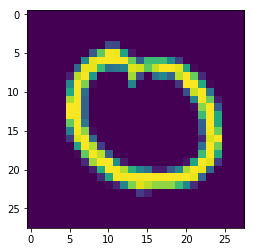

In [15]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[108])

Reshape the X_train and X_test to (m,  28, 28, 1) tensor

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change the values of X_train, X_test to float32 and normalize them between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print the first 10 elements of y_train which contains the class labels for X_train

In [18]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert the values of Y_train and Y_test to one-hot vectors

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [20]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Model Building

Build a simple convolution model

In [21]:
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # Output size = 26; Receptive Field = 3

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24; 5
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22; 7

model.add(MaxPooling2D(pool_size=(2, 2))) # 11; 14
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11; 16

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9; 18
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7; 20

model.add(Convolution2D(20, 3, 3, activation='relu')) # 5; 22

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by Interactive

Print the model summary

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 20)        2900      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 10)        210       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 16)          2320      
__________

Compile the model with the loss function, the optimizer and the metrics used

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Model Training

Fit the model on X_train and Y_train for 10 epochs with a batch size of 32

In [29]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0338 - val_acc: 0.9900
Epoch 2/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0212 - acc: 0.9929 - val_loss: 0.0341 - val_acc: 0.9890
Epoch 3/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0207 - acc: 0.9932 - val_loss: 0.0591 - val_acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0194 - acc: 0.9938 - val_loss: 0.0347 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0327 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0166 - acc: 0.9943 - val_loss: 0.0389 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0142 - acc: 0.9950 - val_loss: 0.

#Model Evaluation

Evaluate the model on the test set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the evaluation score of the model

In [31]:
print(score)

[0.04395396423591447, 0.9895]


#Model Prediction

Use the model to predict the class labels of test set

In [0]:
y_pred = model.predict(X_test)

Compare the predicted values and the actual values

In [33]:
print(y_pred[:9])
print(y_test[:9])

[[2.08246597e-19 3.03983680e-17 8.40293900e-16 3.33702488e-12
  9.29429103e-23 4.02020350e-19 4.17093304e-28 1.00000000e+00
  2.40503938e-17 1.10186062e-11]
 [7.93011054e-07 2.51159345e-05 9.99973774e-01 1.08193889e-08
  7.06620960e-12 3.51716472e-14 3.94182450e-07 6.31581444e-14
  3.90167720e-08 5.27408182e-14]
 [3.73994347e-09 9.99998569e-01 1.95843453e-09 6.85525581e-10
  1.33210392e-06 2.66074052e-10 8.40880787e-09 1.10857535e-07
  1.85648492e-08 2.99656522e-10]
 [9.99908090e-01 7.47267848e-14 2.31759557e-07 2.41158159e-06
  1.71703693e-10 1.60655151e-08 8.84830006e-05 2.37794473e-09
  4.69999549e-07 3.74892181e-07]
 [1.47627223e-12 6.72648352e-13 4.53282941e-12 6.08338258e-15
  9.99999881e-01 1.49636515e-13 1.19899618e-10 2.23891461e-09
  7.10944992e-09 1.46250400e-07]
 [2.54882404e-09 9.99988794e-01 2.05583497e-08 1.10512953e-11
  1.10628862e-05 2.92159769e-11 1.42771501e-08 1.67181170e-07
  7.29508720e-09 6.13457563e-10]
 [5.33906518e-19 5.15598293e-11 6.76386776e-14 3.04511653e

###Results###
1. With the same architecture as First Model, we have reached 99.02% validation accuracy with 14k parameters. We have added an addition 16 channel layer in the end.
2. We do have make any further changes to the MaxPooling or 1x1 layer, as this architecture works pretty well.
3. Also, the no. of channels are increasing with each layer, except we repeat the same no. of channels with two layers in the end.